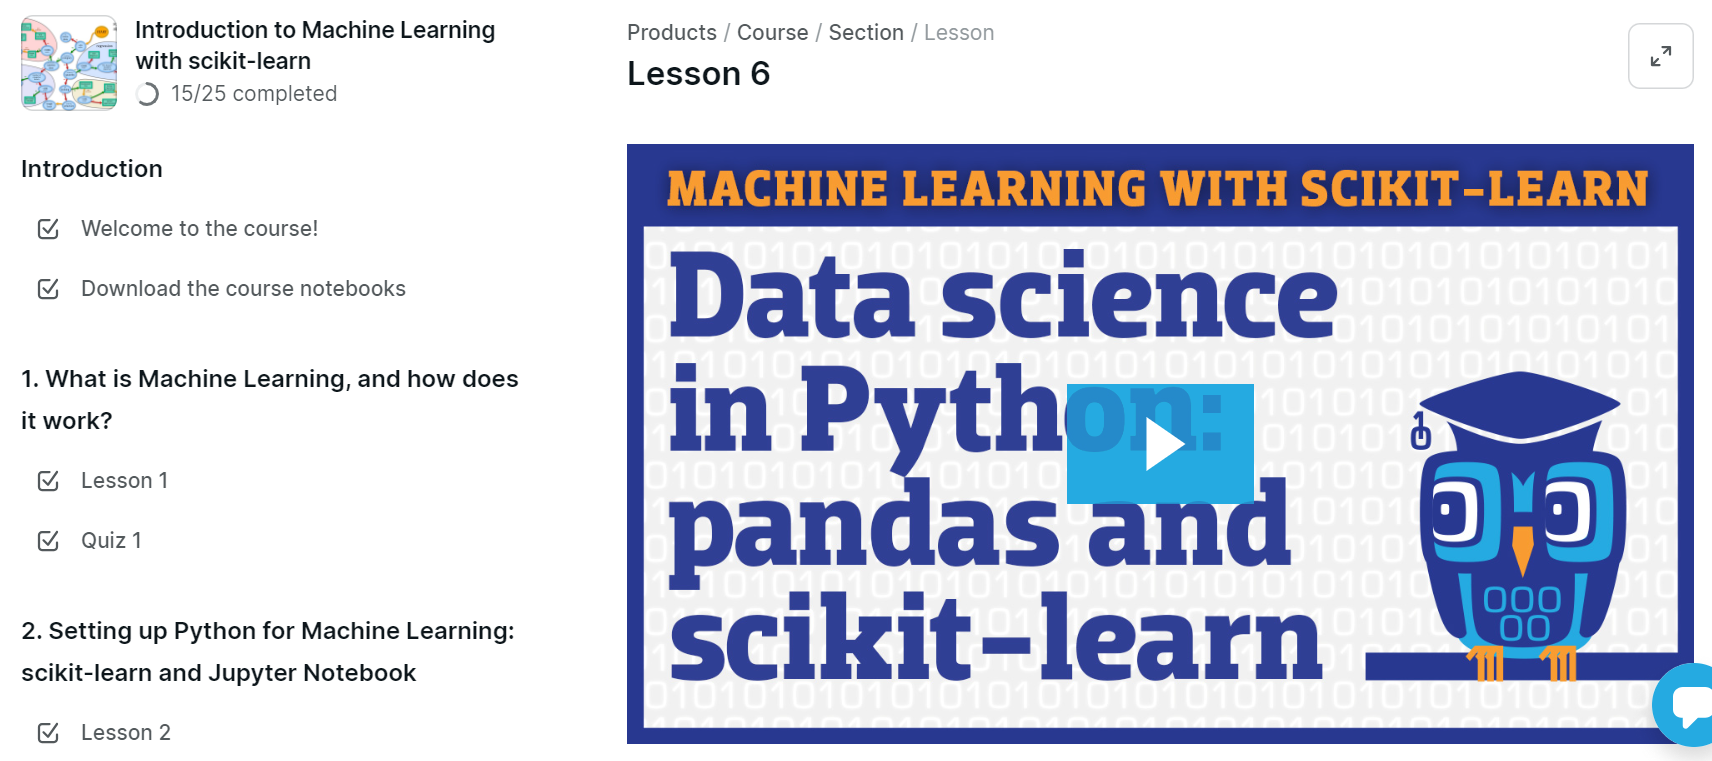

# Lesson 6: Regression

In [1]:
import pandas as pd

adv = pd.read_csv('Advertising.csv', index_col=0)
adv.head()

C:\Users\ultra\AppData\Local\Temp\ipykernel_14108\2357759203.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [2]:
adv.shape

(200, 4)

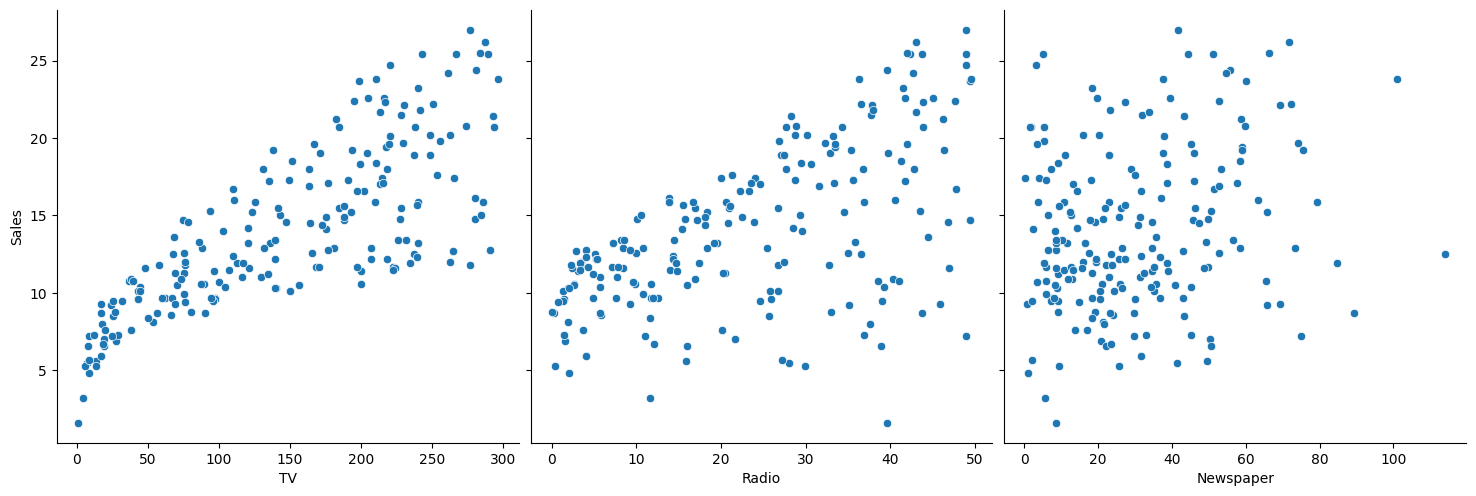

In [3]:
import seaborn as sns

sns.pairplot(data=adv, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5);

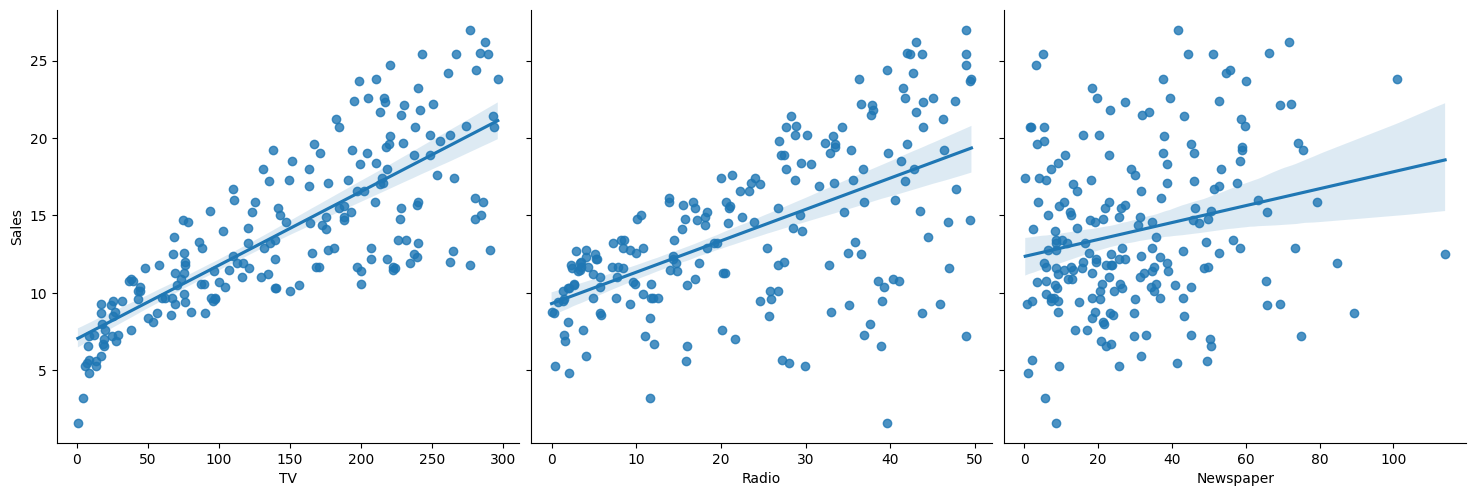

In [4]:
# Added 'kind' attribute
sns.pairplot(data=adv, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, kind='reg');

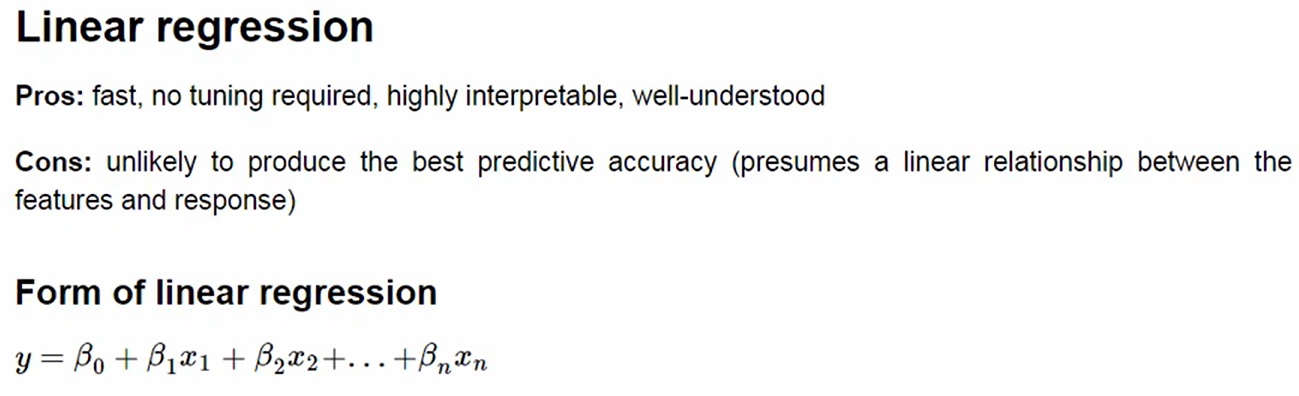

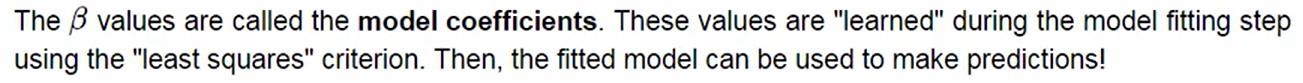

In [5]:
X = adv[['TV', 'Radio', 'Newspaper']]
y = adv['Sales']

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
# Split data into train (75%) and test(25%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

In [7]:
# Fit the model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

2.7991679127998985
[0.04648022 0.1845547  0.00286741]


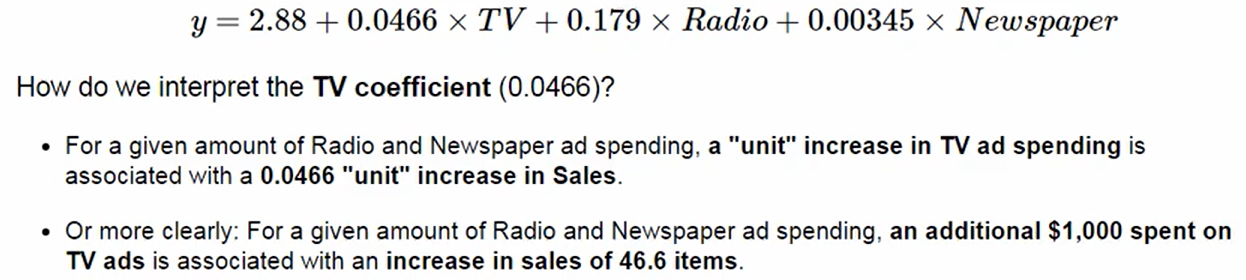

In [9]:
y_pred = lin_reg.predict(X_test)
y_pred

array([14.75846783, 16.41852084, 16.41759144, 12.03709252, 20.70723013,
       17.29565452, 14.96988622, 19.65050706, 23.56456091, 11.97347741,
       19.50018553, 12.76087618, 10.57222916, 18.94036675,  8.59530013,
       21.85921162, 12.62654629, 14.56942078,  9.97244579, 16.37300148,
       15.78422833, 13.0595913 , 14.24547458, 17.10679479, 18.06357979,
       10.40616358,  9.69680278, 10.48598218, 16.34460782, 11.46674105,
       10.58161139,  8.17350495,  9.10425404,  7.90763047, 23.2733627 ,
        4.44591202,  4.43201673,  9.83072166, 12.90035894, 13.42658867,
       15.33659361, 19.64025587,  7.72524213, 15.61866872, 17.98812442,
       13.69839908,  6.54033781, 10.97508723,  5.29713478,  5.1469155 ])

In [10]:
# Calculates regression's metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(f'Root squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

1.219197184824845
2.4972996158775893
Root squared error: 1.580284662925509


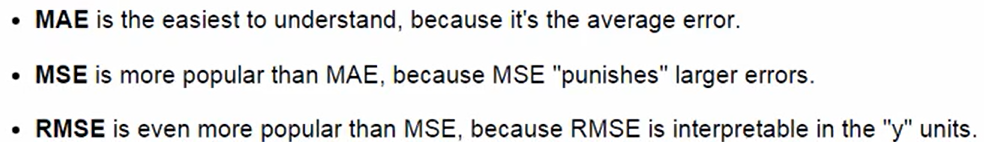

In [11]:
# In Feature Selection we removed 'Newspaper' feature and decrese RMSE score

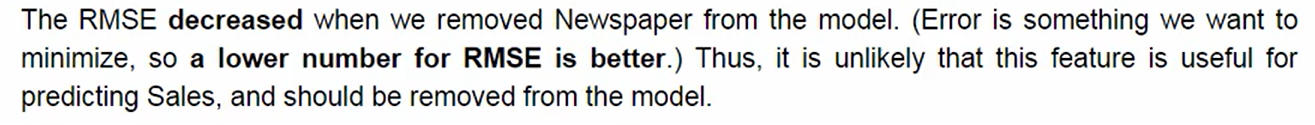

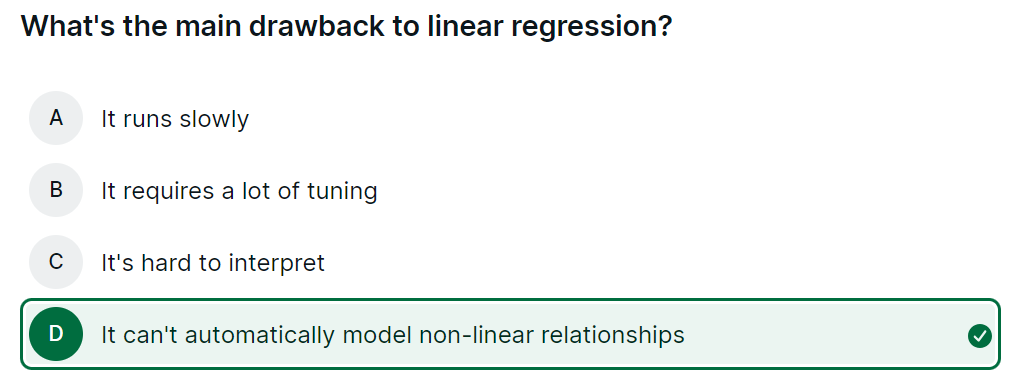

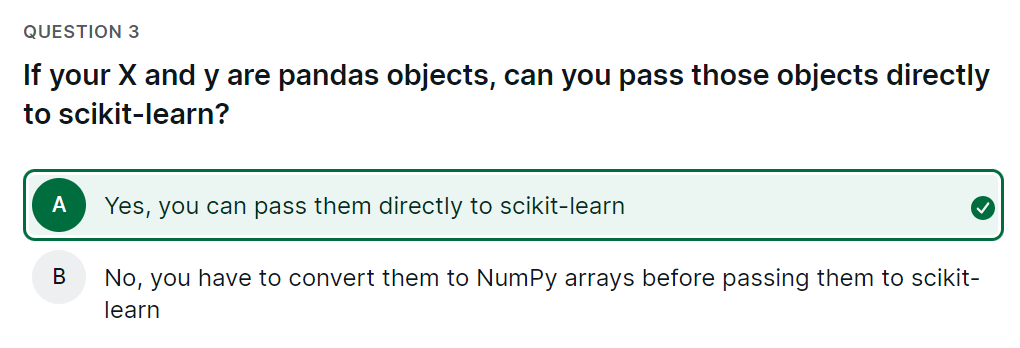

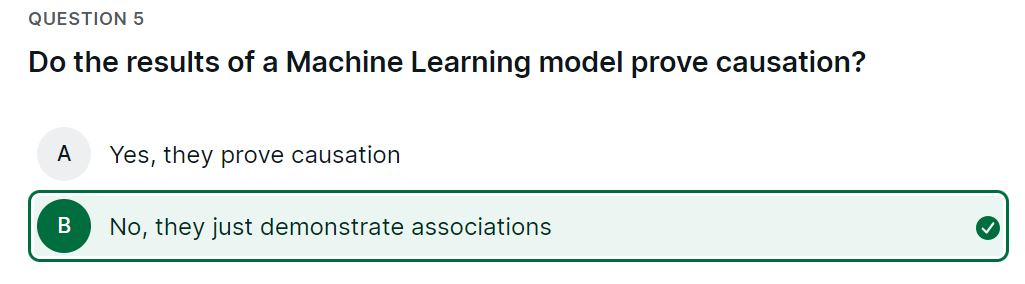

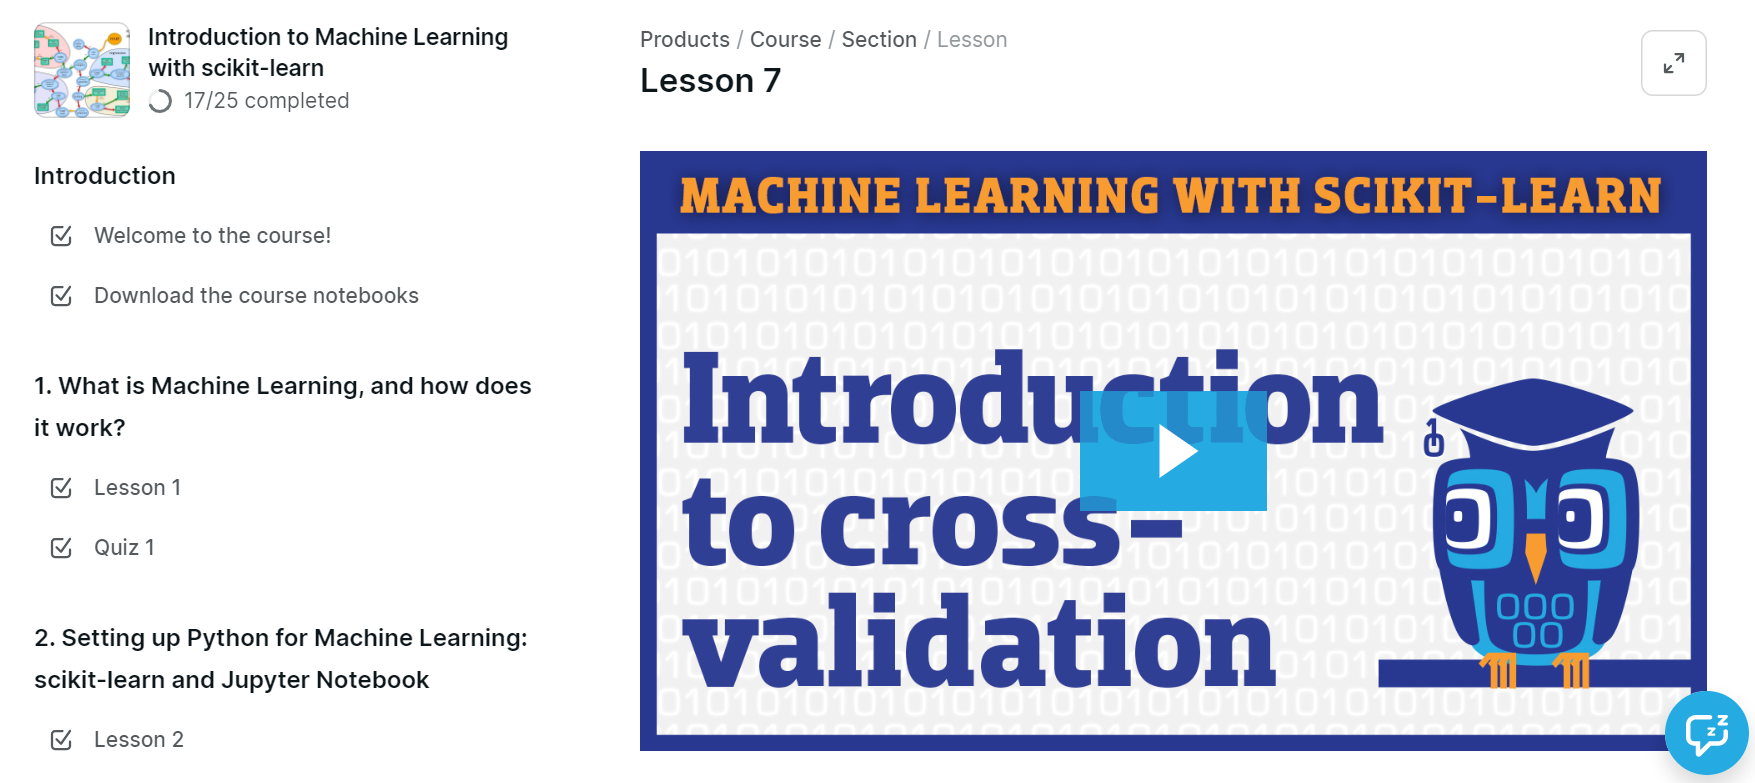

# Lesson 7: Cross-validation

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


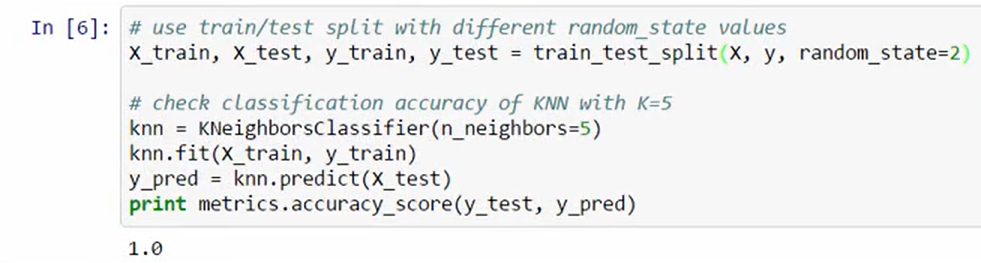
### Other value of random_state can improve Your evaluation from 0.95 to 1.0!

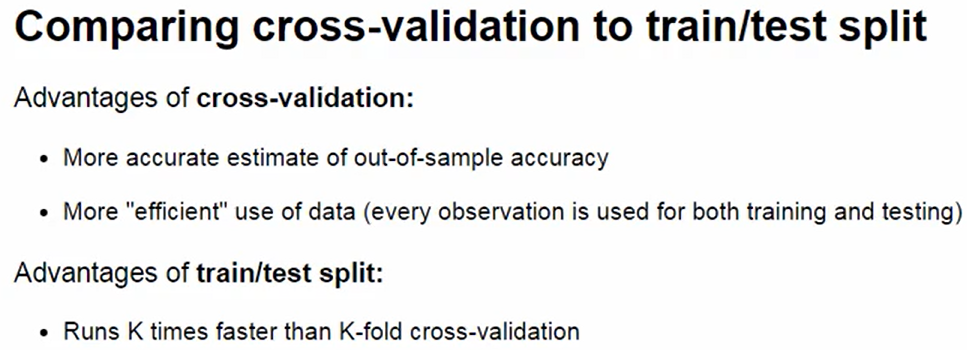

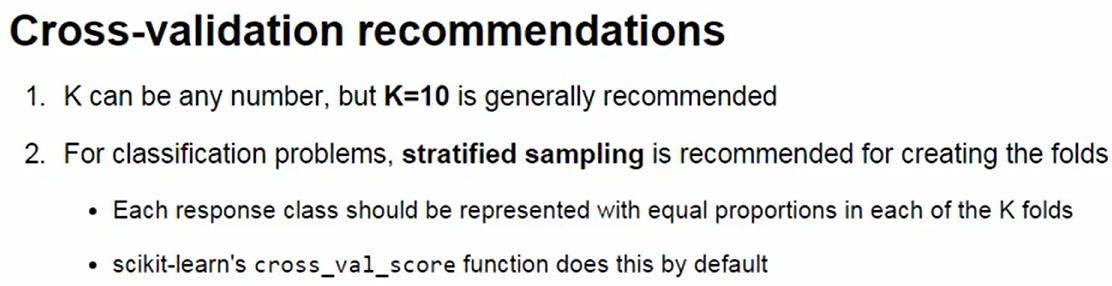

In [16]:
# Cross-validation
from sklearn.model_selection import cross_val_score

### We put entire X and y. Not X_train and y_train. Cross_val split the data by itself, so we don't have to split it

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(estimator=knn, X=X, y=y, scoring='accuracy', cv=10)
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [18]:
print(scores.mean())

0.9666666666666668


In [19]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


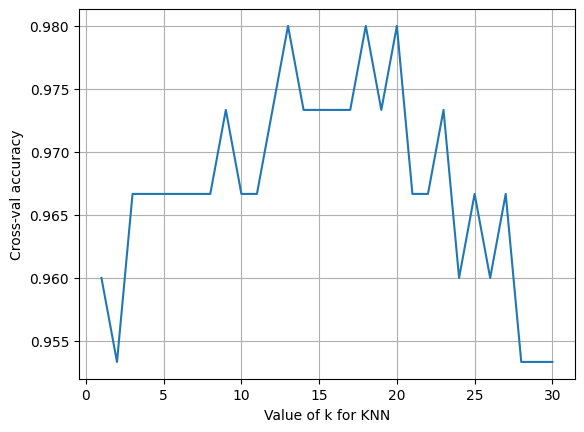

In [20]:
import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.grid()
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-val accuracy');

### Here better to choose k = 20 because bigger k decrease complexity ???

In [21]:
import warnings

warnings.simplefilter('ignore')

In [22]:
# 10-fold cross-validation with KNN and Logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
print('Log Reg', np.round(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean(), 3))
print()
knn = KNeighborsClassifier(n_neighbors=20)
print('KNN', np.round(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean(), 3))

Log Reg 0.973

KNN 0.98


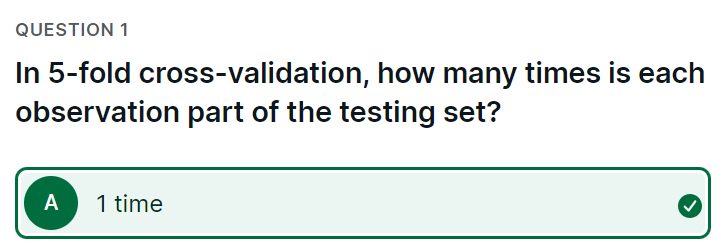

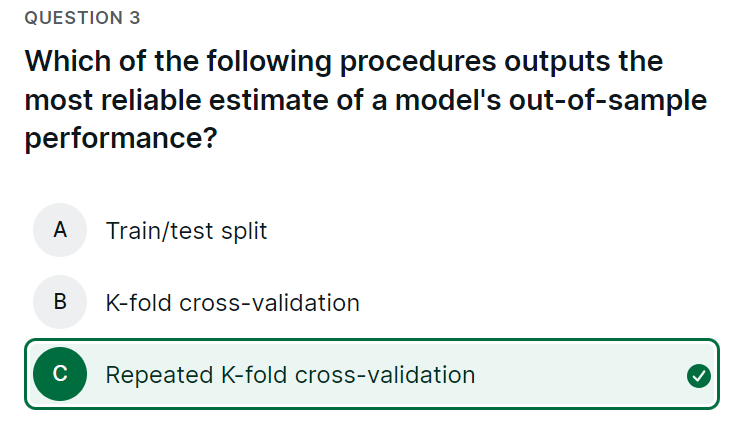

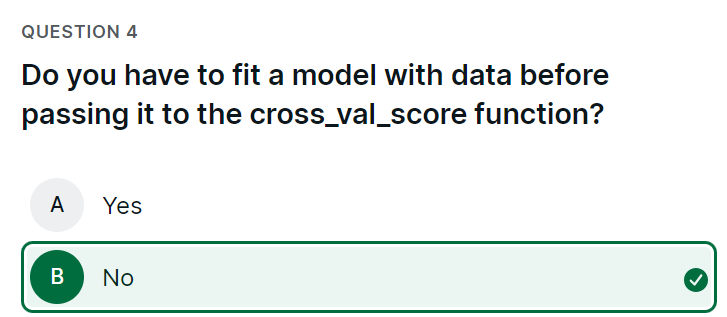

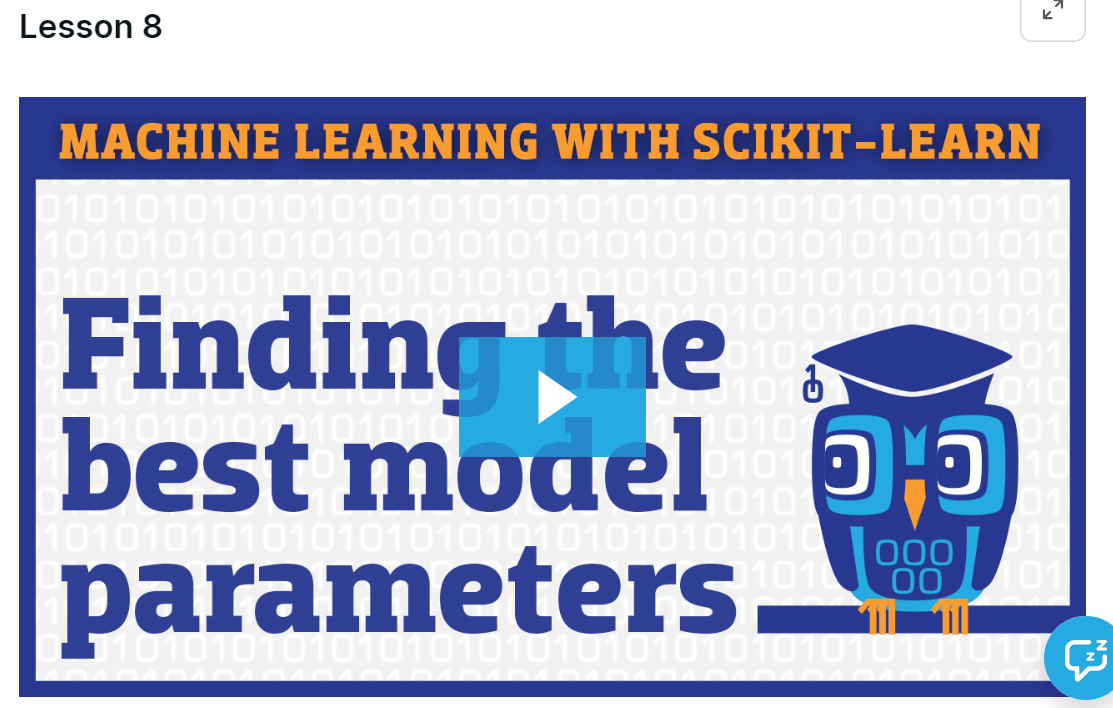

In [23]:
from sklearn.model_selection import GridSearchCV

k_range = range(1, 31)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [24]:
grid.fit(X, y)
grid.best_score_

0.9800000000000001

In [25]:
grid.best_params_

{'n_neighbors': 13}

In [26]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

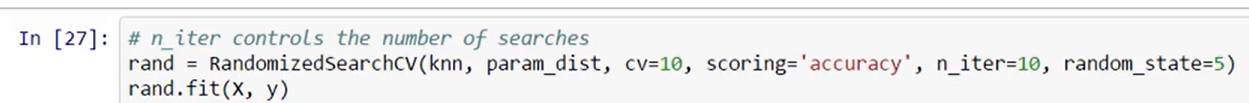

# Lesson 9

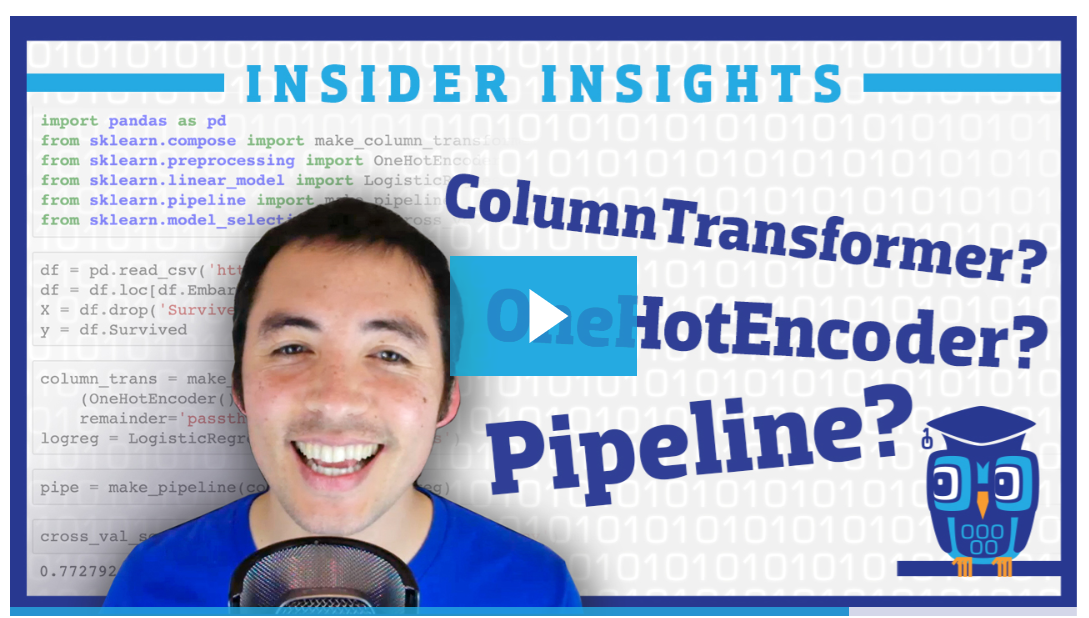

In [27]:
import pandas as pd

titanic = pd.read_csv('http://bit.ly/kaggletrain')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [28]:
titanic.shape

(891, 12)

In [29]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
# Whether there is no NaN values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
titanic.loc[:, ['Survived', 'Pclass', 'Sex', 'Embarked']].head()

Survived  Pclass     Sex Embarked
0         0       3    male        S
1         1       1  female        C
2         1       3  female        S
3         1       1  female        S
4         0       3    male        S

In [32]:
# Exclude missing values
df = titanic.loc[titanic.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Embarked']]

In [33]:
X = df.loc[:, ['Pclass']]
y = df.Survived

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(solver='lbfgs')
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.6783580183861082

In [35]:
y.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [36]:
y.value_counts(normalize=True)

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

In [37]:
df.head()

Survived  Pclass     Sex Embarked
0         0       3    male        S
1         1       1  female        C
2         1       3  female        S
3         1       1  female        S
4         0       3    male        S

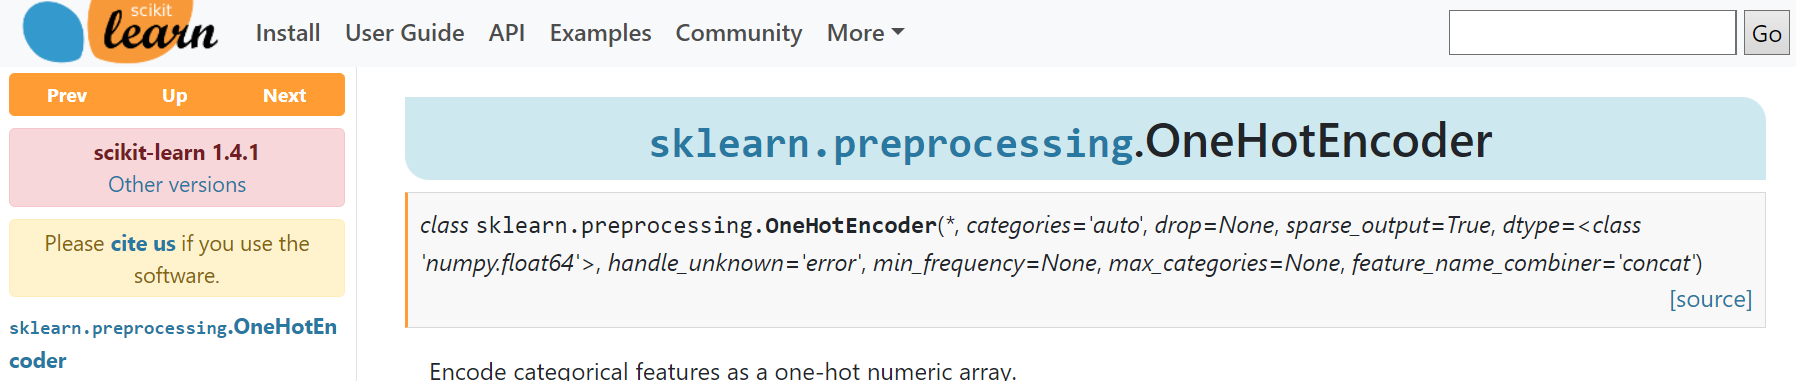

In [38]:
# Transform the data
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(df[['Sex']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [39]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [40]:
X = df.drop('Survived', axis='columns')
X.head()

Pclass     Sex Embarked
0       3    male        S
1       1  female        C
2       3  female        S
3       1  female        S
4       3    male        S

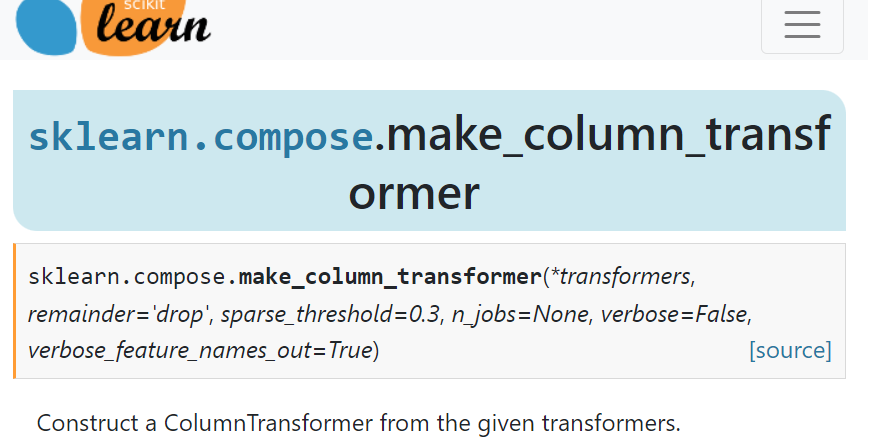

In [41]:
# Use for particular (categorical) columns, not for all
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder='passthrough'
)

column_trans.fit_transform(X)

array([[0., 1., 0., 0., 1., 3.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 3.],
       ...,
       [1., 0., 0., 0., 1., 3.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 3.]])

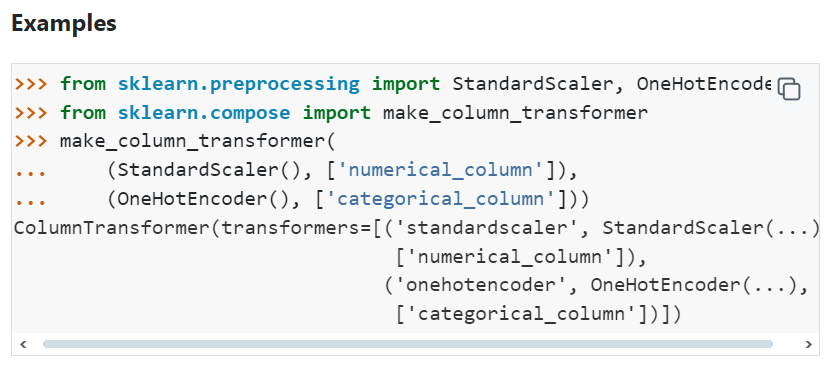

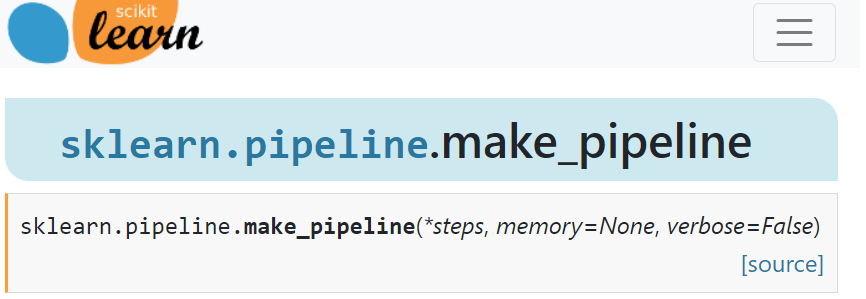

In [42]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(column_trans, logreg)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('logisticregression', LogisticRegression())])

In [43]:
# Entire pipeline
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7727924839713071

In [44]:
# Create dataframe from existing
X_new = X.sample(n=5, random_state=27)
X_new

Pclass     Sex Embarked
433       3    male        S
10        3  female        S
38        3  female        S
747       2  female        S
315       3  female        S

In [45]:
pipe.fit(X, y)
pipe.predict(X_new)

array([0, 1, 1, 1, 1], dtype=int64)

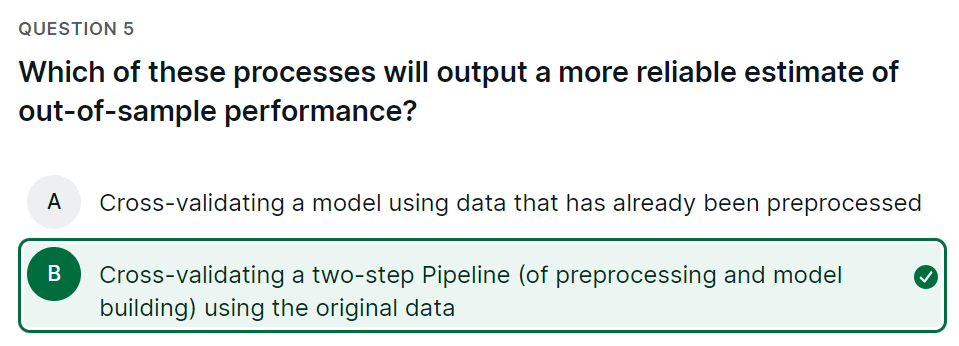

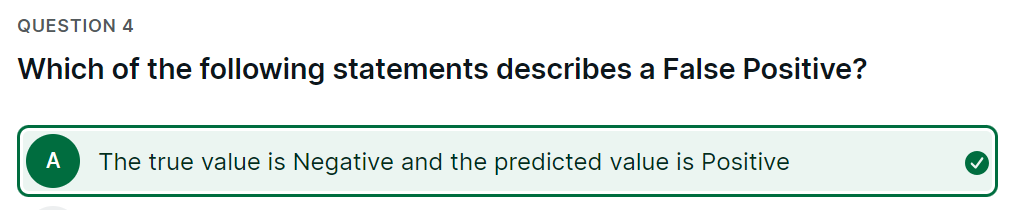

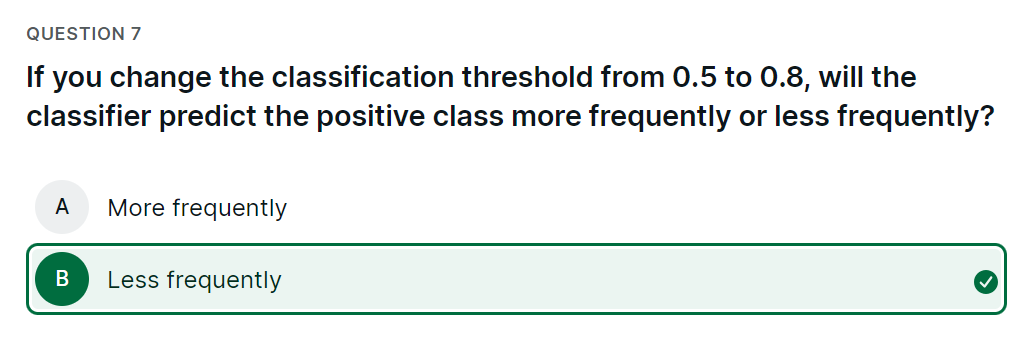

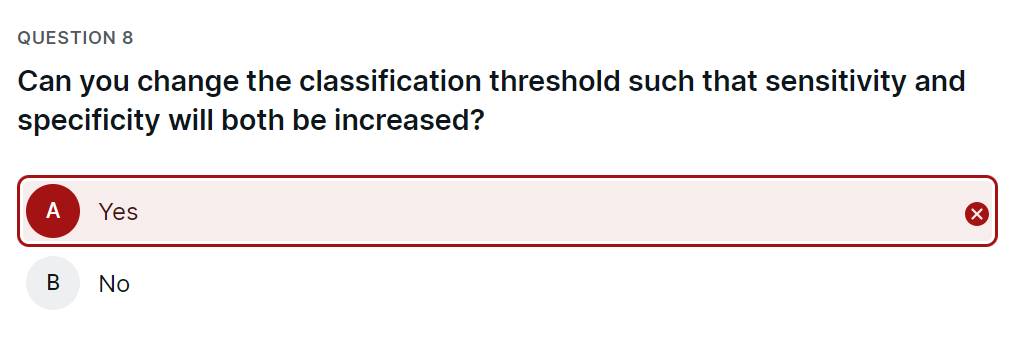

# Lesson 10 (last)

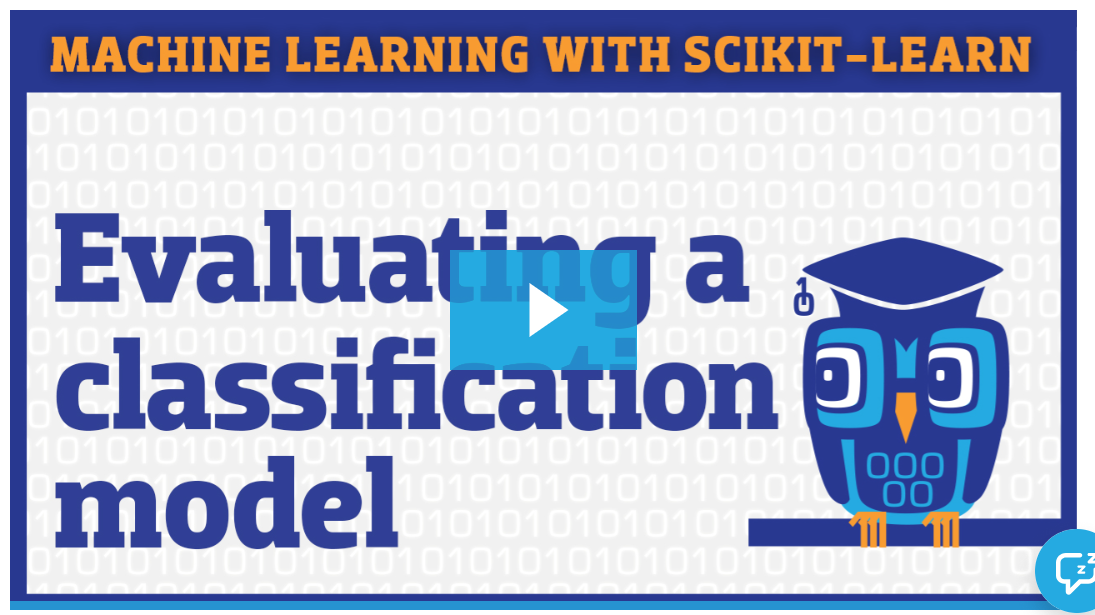